# Extrair uma série temporal de chuva

### Extrair uma série temporal de chuva do ERA5 para todo o período em 1 ponto de lat/lon e numa área (máscara)

###  Importar as bibliotecas

In [2]:
import xarray as xr
import numpy as np
import geopandas as gpd
import regionmask as rmk
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

C:\Users\igf_i\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [4]:
path_ERA5 = 'Dados_ERA5/ERA5_Prec_Month_BR_1991-2023.nc'
path_shape_BR_regs = 'BR_Regioes/regioes.shp'
path_out = 'Serie_Temporal/'

### Carregar os dados (dataset)

In [5]:
df_ERA5 = xr.load_dataset(path_ERA5)

### Selecionar o ponto de lat/lon e a área para serem extraídos

In [6]:
df_ponto = df_ERA5.sel(latitude = -25, longitude = -50, method = 'nearest')
df_area = df_ERA5.sel(latitude = slice(-10, -15), longitude = slice(-55, -45))

In [7]:
df_ponto

<xarray.Dataset>
Dimensions:    (time: 396)
Coordinates:
  * time       (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-12-01
    longitude  float32 -50.0
    latitude   float32 -25.0
Data variables:
    tp         (time) float32 0.006208 0.004653 0.005941 ... 0.006848 0.002411
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Apr 08 08:45:59 2024: cdo -v -z zip -sellonlatbox,-75,-...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [8]:
df_area

<xarray.Dataset>
Dimensions:    (time: 396, longitude: 41, latitude: 21)
Coordinates:
  * time       (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-12-01
  * longitude  (longitude) float32 -55.0 -54.75 -54.5 ... -45.5 -45.25 -45.0
  * latitude   (latitude) float32 -10.0 -10.25 -10.5 ... -14.5 -14.75 -15.0
Data variables:
    tp         (time, latitude, longitude) float32 0.01014 0.01181 ... 0.002365
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Apr 08 08:45:59 2024: cdo -v -z zip -sellonlatbox,-75,-...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

### Selecionar a variável chuva do dataset

In [9]:
df_ponto = df_ponto * 1000 * df_ponto.time.dt.daysinmonth
df_area = df_area * 1000 * df_area.time.dt.daysinmonth

In [11]:
prec_ponto = df_ponto['tp']
prec_area = df_area['tp']

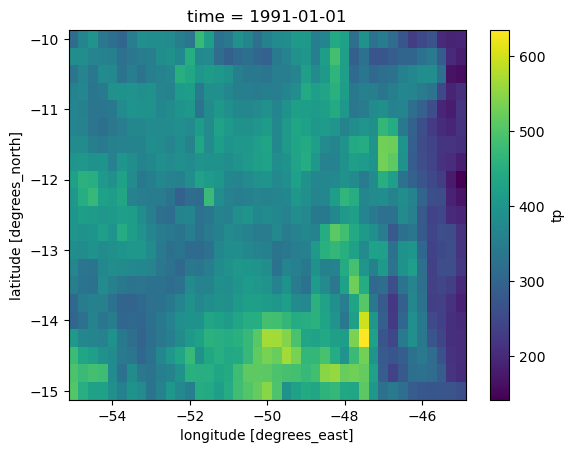

In [12]:
prec_area[0].plot()

### Mascarar a região desejada para extrair também uma série

In [13]:
BR_shp_regs = gpd.read_file(path_shape_BR_regs)

In [14]:
mask_BR_regs = rmk.from_geopandas(BR_shp_regs) 

In [16]:
prec_era5 = df_ERA5['tp'] * 1000 * df_ERA5['tp'].time.dt.daysinmonth

prec_era5 = prec_era5.rename({'latitude': 'lat', 'longitude': 'lon'})

In [17]:
prec_mask = mask_BR_regs.mask(prec_era5)
prec_sudeste = prec_era5.where(prec_mask == 1)

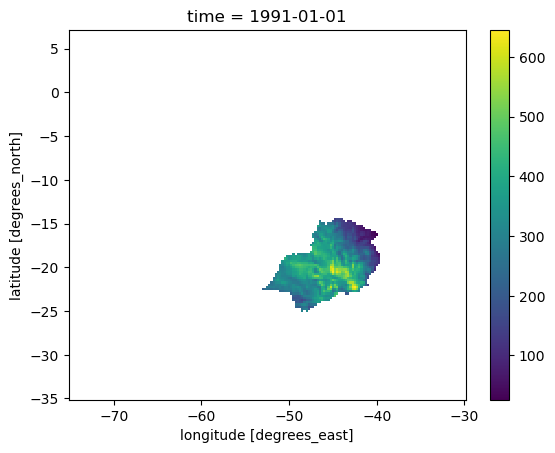

In [18]:
prec_sudeste[0].plot()

### Converter o dado para um dataframe (matriz)


In [19]:
df_ponto = prec_ponto.to_dataframe() #transforma o dataarray em dataframe

In [20]:
df_ponto

,longitude,latitude,tp
time,,,
1991-01-01,-50.0,-25.0,192.434451
1991-02-01,-50.0,-25.0,130.284811
1991-03-01,-50.0,-25.0,184.173187
1991-04-01,-50.0,-25.0,76.457705
1991-05-01,-50.0,-25.0,88.906744
...,...,...,...
2023-08-01,-50.0,-25.0,91.988316
2023-09-01,-50.0,-25.0,80.518570
2023-10-01,-50.0,-25.0,323.171931


In [21]:
 #transforma o dataarray em dataframe, excluíndo as colunas de longitude e latitude
df_ponto = prec_ponto.to_dataframe().drop(columns = ['longitude', 'latitude'])

In [22]:
df_ponto

,tp
time,
1991-01-01,192.434451
1991-02-01,130.284811
1991-03-01,184.173187
1991-04-01,76.457705
1991-05-01,88.906744
...,...
2023-08-01,91.988316
2023-09-01,80.518570
2023-10-01,323.171931


In [23]:
prec_area = prec_area.mean(dim = ['latitude', 'longitude']) #cálculo da média espacial

df_area = prec_area.to_dataframe() #transforma em dataframe

df_area

,tp
time,
1991-01-01,368.098453
1991-02-01,198.481664
1991-03-01,296.070751
1991-04-01,127.745091
1991-05-01,36.560859
...,...
2023-08-01,12.750476
2023-09-01,11.931643
2023-10-01,29.085106


In [24]:
prec_sudeste

<xarray.DataArray (time: 396, lat: 169, lon: 181)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-12-01
  * lon      (lon) float32 -75.0 -74.75 -74.5 -74.25 ... -30.5 -30.25 -30.0
  * lat      (lat) float32 7.0 6.75 6.5 6.25 6.0 ... -34.25 -34.5 -34.75 -35.0

In [25]:
prec_sudeste = prec_sudeste.mean(dim = ['lat', 'lon'])

df_sudeste = prec_sudeste.to_dataframe(name = 'tp')

df_sudeste

,tp
time,
1991-01-01,316.799733
1991-02-01,190.051036
1991-03-01,268.910148
1991-04-01,91.533734
1991-05-01,42.384845
...,...
2023-08-01,37.216485
2023-09-01,19.983011
2023-10-01,116.143094


In [26]:
df_sudeste = df_sudeste.rename(columns = {'tp': 'Prec (mm)'}) #renomeia a coluna tp para Prec (mm)
df_sudeste.index.name = 'Data' #nome do index como Data
df_sudeste.index = df_sudeste.index.strftime('%m/%Y') #formata o index para o tipo 01/1991
df_sudeste

,Prec (mm)
Data,
01/1991,316.799733
02/1991,190.051036
03/1991,268.910148
04/1991,91.533734
05/1991,42.384845
...,...
08/2023,37.216485
09/2023,19.983011
10/2023,116.143094


In [27]:
df_ponto

,tp
time,
1991-01-01,192.434451
1991-02-01,130.284811
1991-03-01,184.173187
1991-04-01,76.457705
1991-05-01,88.906744
...,...
2023-08-01,91.988316
2023-09-01,80.518570
2023-10-01,323.171931


In [28]:
df_area

,tp
time,
1991-01-01,368.098453
1991-02-01,198.481664
1991-03-01,296.070751
1991-04-01,127.745091
1991-05-01,36.560859
...,...
2023-08-01,12.750476
2023-09-01,11.931643
2023-10-01,29.085106


In [29]:
df_sudeste

,Prec (mm)
Data,
01/1991,316.799733
02/1991,190.051036
03/1991,268.910148
04/1991,91.533734
05/1991,42.384845
...,...
08/2023,37.216485
09/2023,19.983011
10/2023,116.143094


### Exportar o dataframe para um .csv

In [30]:
df_ponto.to_csv(f'{path_out}Serie_Temporal_Ponto.csv') #exporta em csv

df_area.to_csv(f'{path_out}Serie_Temporal_Area.csv', sep = ';') #exporta em csv como separador ;

df_sudeste.to_csv(f'{path_out}Serie_Temporal_Sudeste.csv', header = None) #exporta em csv sem os labels das colunas (header)